In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from pandas_profiling import ProfileReport
from datetime import datetime

In [2]:
df =pd.read_csv("matches.csv")

In [3]:
#profile = ProfileReport(df, title="Pandas Profiling Report")

In [4]:
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [5]:
#profile

In [6]:
df.describe()

id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000

In [7]:
df['city'].fillna("None", inplace=True)

In [8]:
df['umpire1'].fillna("None", inplace=True)

In [9]:
df['umpire2'].fillna("None", inplace=True)

In [10]:
df['player_of_match'].fillna("None", inplace=True)

In [11]:
df['winner'].fillna("None", inplace=True)

In [12]:
df['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'None', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            637
dtype: int64

[Text(0.5, 1.0, 'obsevation')]

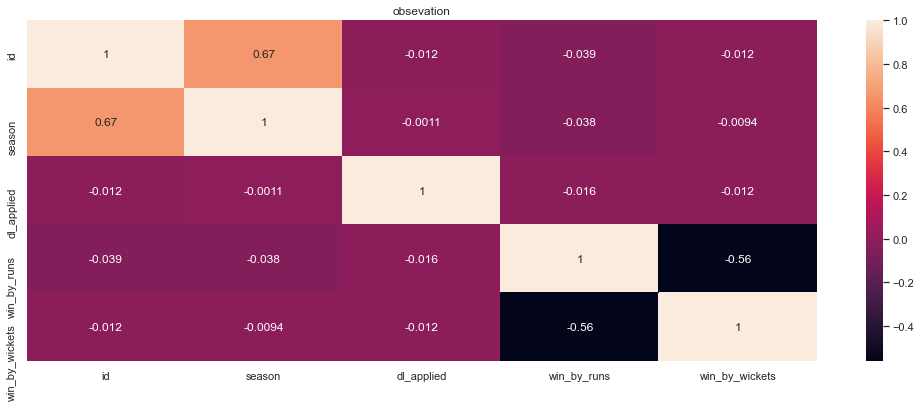

In [14]:
correleation_matrix=df.corr()
sns.set(rc={'figure.figsize':(17.7,6.27)})
sns.heatmap(data=correleation_matrix, annot=True).set(title='obsevation')

In [15]:
type(df['winner'])

pandas.core.series.Series

In [16]:
df['winner'].shape

(756,)

In [17]:
type(df[['team1','team2','winner']])

pandas.core.frame.DataFrame

In [18]:
df[['team1','team2','winner']].shape

(756, 3)

In [19]:
mask1 = df['win_by_runs'] <=30 
runs=df[mask1]


In [20]:
runs.groupby('winner')['win_by_runs'].count()

winner
Chennai Super Kings            78
Deccan Chargers                24
Delhi Capitals                  8
Delhi Daredevils               57
Gujarat Lions                  13
Kings XI Punjab                73
Kochi Tuskers Kerala            6
Kolkata Knight Riders          78
Mumbai Indians                 85
None                            4
Pune Warriors                  11
Rajasthan Royals               63
Rising Pune Supergiant          9
Rising Pune Supergiants         4
Royal Challengers Bangalore    71
Sunrisers Hyderabad            51
Name: win_by_runs, dtype: int64

In [21]:
def get_city_match_count(city):
    mask=df['city']==city
    return df[mask].shape[0]


In [22]:
get_city_match_count("Ranchi")

7

In [23]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'None', 'Mohali', 'Bengaluru'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          119 non-null    ob

In [25]:
#mask1 = df['city'] =='Hyderabad'
mask2 = df['date'] > '2010-04-06'
df[mask2]

id  season       city        date                        team1  \
0        1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017       Pune  2017-04-06               Mumbai Indians   
2        3    2017     Rajkot  2017-04-07                Gujarat Lions   
3        4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...        ...         ...                          ...   
740  11336    2019     Jaipur    27/04/19          Sunrisers Hyderabad   
741  11337    2019      Delhi    28/04/19               Delhi Capitals   
742  11338    2019    Kolkata    28/04/19        Kolkata Knight Riders   
743  11339    2019  Hyderabad    29/04/19          Sunrisers Hyderabad   
744  11340    2019  Bengaluru    30/04/19  Royal Challengers Bangalore   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
740             Rajasthan Royals             Rajasthan Royals         field   
741  Royal Challengers Bangalore               Delhi Capitals           bat   
742               Mumbai Indians               Mumbai Indians         field   
743              Kings XI Punjab              Kings XI Punjab         field   
744             Rajasthan Royals             Rajasthan Royals         field   

        result  dl_applied                       winner  win_by_runs  \
0       normal           0          Sunrisers Hyderabad           35   
1       normal           0       Rising Pune Supergiant            0   
2       normal           0        Kolkata Knight Riders            0   
3       normal           0              Kings XI Punjab            0   
4       normal           0  Royal Challengers Bangalore           15   
..         ...         ...                          ...          ...   
740     normal           0             Rajasthan Royals            0   
741     normal           0               Delhi Capitals           16   
742     normal           0        Kolkata Knight Riders           34   
743     normal           0          Sunrisers Hyderabad           45   
744  no result           0                         None            0   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
740               7      JD Unadkat   
741               0        S Dhawan   
742               0      AD Russell   
743               0       DA Warner   
744               0            None   

                                         venue         umpire1  \
0    Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1      Maharashtra Cricket Association Stadium  A Nand Kishore   
2       Saurashtra Cricket Association Stadium     Nitin Menon   
3                       Holkar Cricket Stadium    AK Chaudhary   
4                        M Chinnaswamy Stadium            None   
..                                         ...             ...   
740                     Sawai Mansingh Stadium  Yeshwant Barde   
741                    Feroz Shah Kotla Ground  Bruce Oxenford   
742                               Eden Gardens       Ian Gould   
743         Rajiv Gandhi Intl. Cricket Stadium          S Ravi   
744                     M. Chinnaswamy Stadium     Nigel Llong   

                   umpire2         umpire3 

In [26]:
mask3 = df['city'] =='Hyderabad'
mask4 = df['venue'] == 'Rajiv Gandhi International Stadium, Uppal'
df[mask3 & mask4].shape[0]



56

In [27]:
df.sort_values('city', ascending=False)# if you want any perfomant changes here then type inplace=True

id  season           city        date                        team1  \
536    537    2015  Visakhapatnam  2015-04-22          Sunrisers Hyderabad   
528    529    2015  Visakhapatnam  2015-04-16          Sunrisers Hyderabad   
315    316    2012  Visakhapatnam  2012-04-09              Deccan Chargers   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
..     ...     ...            ...         ...                          ...   
470    471    2014      Abu Dhabi  2014-04-26  Royal Challengers Bangalore   
460    461    2014      Abu Dhabi  2014-04-18          Sunrisers Hyderabad   
457    458    2014      Abu Dhabi  2014-04-16        Kolkata Knight Riders   
464    465    2014      Abu Dhabi  2014-04-21          Chennai Super Kings   
459    460    2014      Abu Dhabi  2014-04-18          Chennai Super Kings   

                     team2            toss_winner toss_decision  result  \
536  Kolkata Knight Riders  Kolkata Knight Riders         field  normal   
528       Rajasthan Royals       Rajasthan Royals         field  normal   
315         Mumbai Indians        Deccan Chargers           bat  normal   
754    Chennai Super Kings    Chennai Super Kings         field  normal   
753         Delhi Capitals         Delhi Capitals         field  normal   
..                     ...                    ...           ...     ...   
470       Rajasthan Royals       Rajasthan Royals         field  normal   
460       Rajasthan Royals       Rajasthan Royals         field  normal   
457         Mumbai Indians  Kolkata Knight Riders           bat  normal   
464       Delhi Daredevils    Chennai Super Kings           bat  normal   
459        Kings XI Punjab    Chennai Super Kings           bat  normal   

     dl_applied                 winner  win_by_runs  win_by_wickets  \
536           1    Sunrisers Hyderabad           16               0   
528           0       Rajasthan Royals            0               6   
315           0         Mumbai Indians            0               5   
754           0    Chennai Super Kings            0               6   
753           0         Delhi Capitals            0               2   
..          ...                    ...          ...             ...   
470           0       Rajasthan Royals            0               6   
460           0       Rajasthan Royals            0               4   
457           0  Kolkata Knight Riders           41               0   
464           0    Chennai Super Kings           93               0   
459           0        Kings XI Punjab            0               6   

    player_of_match                                              venue  \
536       DA Warner  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
528       AM Rahane  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
315       RG Sharma  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
754    F du Plessis                                   ACA-VDCA Stadium   
753         RR Pant                                   ACA-VDCA Stadium   
..              ...                                                ...   
470        PV Tambe                               Sheikh Zayed Stadium   
460       AM Rahane                               Sheikh Zayed Stadium   
457       JH Kallis                               Sheikh Zayed Stadium   
464        SK Raina                               Sheikh Zayed Stadium   
459      GJ Maxwell                               Sheikh Zayed Stadium   

             umpire1         umpire2                  umpire3  
536   RK Illingworth     VA Kulkarni                      NaN  
528        PG Pathak          S Ravi                      NaN  
315     AK Chaudhary       JD Cloete                      NaN  
754    Sundaram Ravi  Bruce Oxenford  Chettithody Shamshuddin  
753             None            None                      NaN  
..               ...             ...        

In [28]:
df.sort_values(['city','date'], ascending =[True,False])

id  season           city        date                        team1  \
475    476    2014      Abu Dhabi  2014-04-29             Rajasthan Royals   
470    471    2014      Abu Dhabi  2014-04-26  Royal Challengers Bangalore   
471    472    2014      Abu Dhabi  2014-04-26              Kings XI Punjab   
464    465    2014      Abu Dhabi  2014-04-21          Chennai Super Kings   
459    460    2014      Abu Dhabi  2014-04-18          Chennai Super Kings   
..     ...     ...            ...         ...                          ...   
528    529    2015  Visakhapatnam  2015-04-16          Sunrisers Hyderabad   
315    316    2012  Visakhapatnam  2012-04-09              Deccan Chargers   
312    313    2012  Visakhapatnam  2012-04-07          Chennai Super Kings   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   

                     team2            toss_winner toss_decision  result  \
475  Kolkata Knight Riders       Rajasthan Royals           bat     tie   
470       Rajasthan Royals       Rajasthan Royals         field  normal   
471  Kolkata Knight Riders  Kolkata Knight Riders         field  normal   
464       Delhi Daredevils    Chennai Super Kings           bat  normal   
459        Kings XI Punjab    Chennai Super Kings           bat  normal   
..                     ...                    ...           ...     ...   
528       Rajasthan Royals       Rajasthan Royals         field  normal   
315         Mumbai Indians        Deccan Chargers           bat  normal   
312        Deccan Chargers        Deccan Chargers         field  normal   
754    Chennai Super Kings    Chennai Super Kings         field  normal   
753         Delhi Capitals         Delhi Capitals         field  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
475           0     Rajasthan Royals            0               0   
470           0     Rajasthan Royals            0               6   
471           0      Kings XI Punjab           23               0   
464           0  Chennai Super Kings           93               0   
459           0      Kings XI Punjab            0               6   
..          ...                  ...          ...             ...   
528           0     Rajasthan Royals            0               6   
315           0       Mumbai Indians            0               5   
312           0  Chennai Super Kings           74               0   
754           0  Chennai Super Kings            0               6   
753           0       Delhi Capitals            0               2   

    player_of_match                                              venue  \
475     JP Faulkner                               Sheikh Zayed Stadium   
470        PV Tambe                               Sheikh Zayed Stadium   
471  Sandeep Sharma                               Sheikh Zayed Stadium   
464        SK Raina                               Sheikh Zayed Stadium   
459      GJ Maxwell                               Sheikh Zayed Stadium   
..              ...                                                ...   
528       AM Rahane  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
315       RG Sharma  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
312       RA Jadeja  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
754    F du Plessis                                   ACA-VDCA Stadium   
753         RR Pant                                   ACA-VDCA Stadium   

             umpire1          umpire2                  umpire3  
475        Aleem Dar     AK Chaudhary                      NaN  
470  HDPK Dharmasena    C Shamshuddin                      NaN  
471  HDPK Dharmasena   RK Illingworth                      NaN  
464   RK Illingworth    C Shamshuddin                      NaN  
459   RK Illingworth    C Shamshuddin                      NaN  
..               ...              ...                      ...

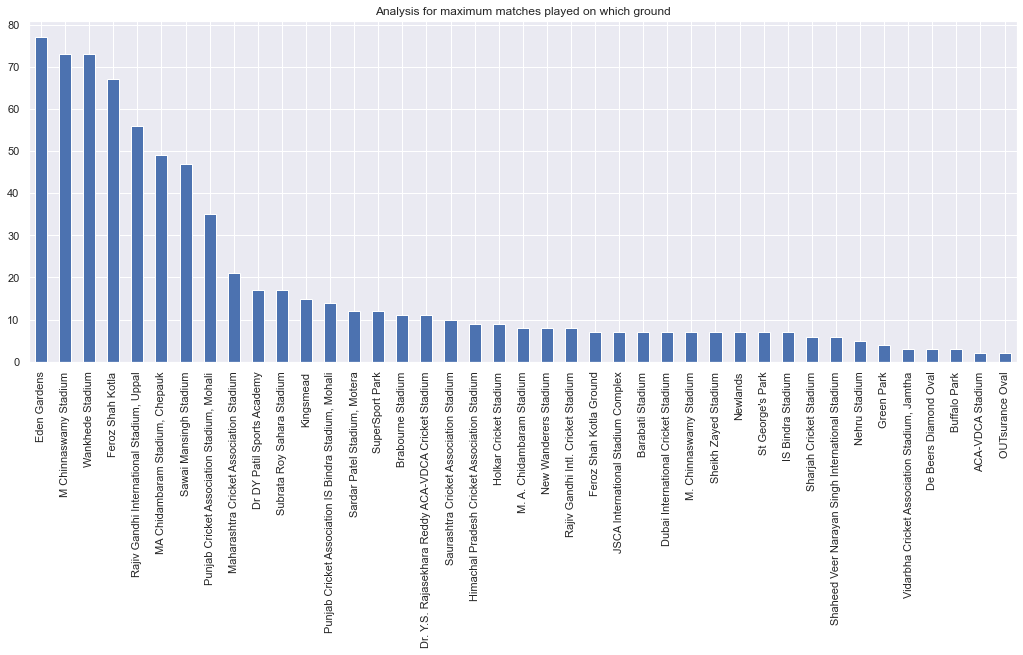

In [29]:
x=df['venue'].value_counts().plot(kind='bar',title='Analysis for maximum matches played on which ground')


#sns.barplot(x='x',y='venue', data=df)

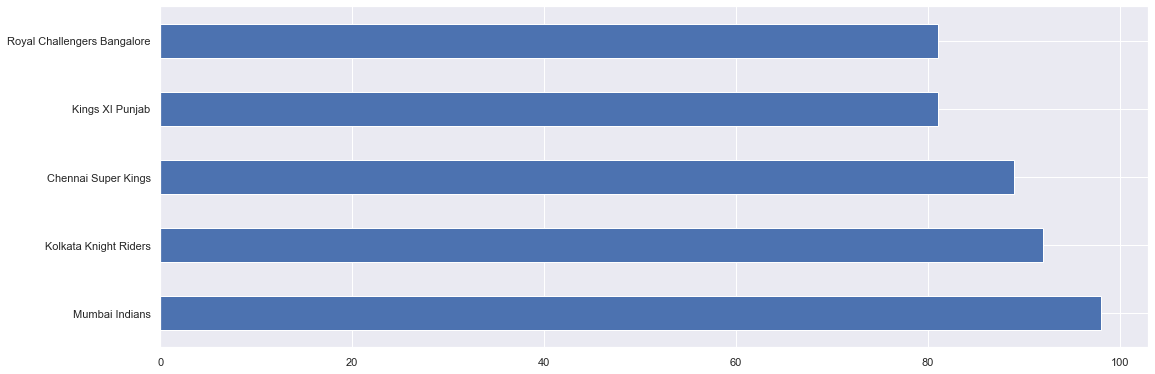

In [30]:
df['toss_winner'].value_counts().head().plot(kind='barh')

In [31]:
df.head(3)

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   
2   3    2017     Rajkot  2017-04-07        Gujarat Lions   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   
2  normal           0   Kolkata Knight Riders            0              10   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   

     umpire2 umpire3  
0   NJ Llong     NaN  
1     S Ravi     NaN  
2  CK Nandan     NaN

In [32]:
mask8 = df['season'] =='2017'
mask7 = df['toss_winner'] == 'Hyderabad'
df[mask8 & mask7]
df.columns

C:\Users\Shubham\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [33]:
myseries =df['winner'].value_counts()

In [34]:
myseries['Royal Challengers Bangalore']

84

In [35]:
team =df['team1'].value_counts()
team

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [36]:
team2 =df['team2'].value_counts()

In [37]:
team['Royal Challengers Bangalore']  #how many times Banglore was won from team 1

85

In [38]:
team =df['team1'].value_counts()

In [39]:
team2['Royal Challengers Bangalore'] ##how many times Banglore was won from team 2

95

In [40]:
x=df['team1'].value_counts() + df['team2'].value_counts()

In [41]:
x=df['team1'].value_counts() + df['team2'].value_counts()

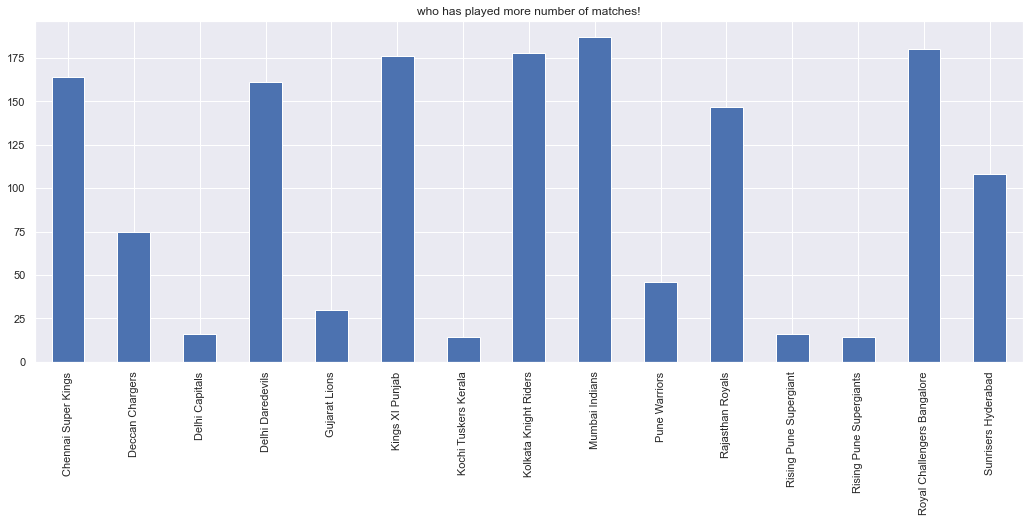

In [42]:
z=x.plot(kind='bar',title='who has played more number of matches!')


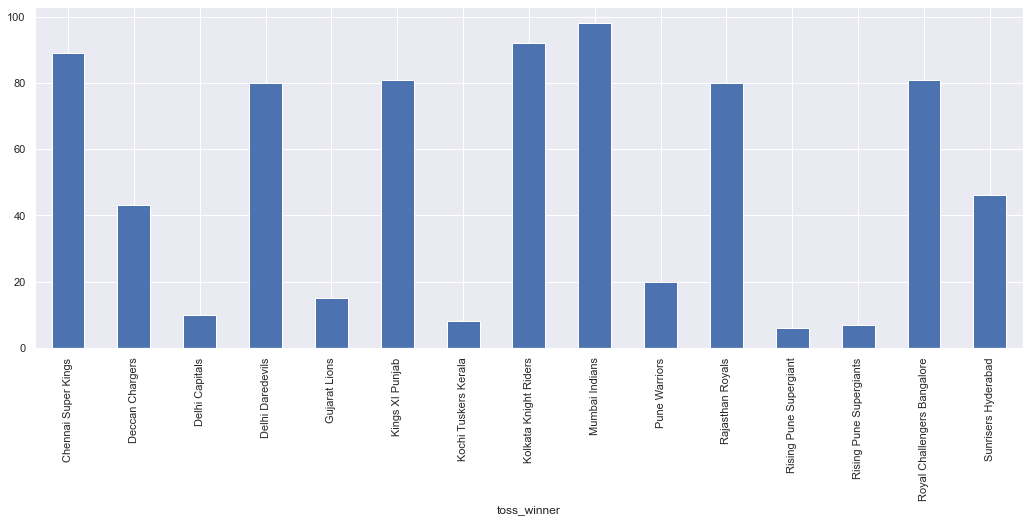

In [43]:
df.groupby('toss_winner')['team2'].count().plot(kind='bar') #top five more number toss winner

In [44]:
teamCom2=df['team2'].value_counts()

In [45]:
x=df['season']==2018
y=df['team2']=='Delhi Daredevils'
z=df[x & y]

In [46]:
z.groupby('city')['winner'].count()

city
Delhi      1
Jaipur     1
Kolkata    1
Mumbai     1
Pune       1
Name: winner, dtype: int64

In [47]:
df.head(5)

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4            None           None     NaN

In [48]:
df.head(10)

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
5   6    2017  Hyderabad  2017-04-09                Gujarat Lions   
6   7    2017     Mumbai  2017-04-09        Kolkata Knight Riders   
7   8    2017     Indore  2017-04-10  Royal Challengers Bangalore   
8   9    2017       Pune  2017-04-11             Delhi Daredevils   
9  10    2017     Mumbai  2017-04-12          Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   
5          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
6               Mumbai Indians               Mumbai Indians         field   
7              Kings XI Punjab  Royal Challengers Bangalore           bat   
8       Rising Pune Supergiant       Rising Pune Supergiant         field   
9               Mumbai Indians               Mumbai Indians         field   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   
5  normal           0          Sunrisers Hyderabad            0   
6  normal           0               Mumbai Indians            0   
7  normal           0              Kings XI Punjab            0   
8  normal           0             Delhi Daredevils           97   
9  normal           0               Mumbai Indians            0   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   
5               9     Rashid Khan  Rajiv Gandhi International Stadium, Uppal   
6               4          N Rana                           Wankhede Stadium   
7               8        AR Patel                     Holkar Cricket Stadium   
8               0       SV Samson    Maharashtra Cricket Association Stadium   
9               4       JJ Bumrah                           Wankhede Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4            None           None     NaN  
5      A Deshmukh       NJ Llong     NaN  
6     Nitin Menon      CK Nandan     NaN  
7    AK Chaudhary  C Shamshuddin     NaN  
8     AY Dandekar         S Ravi     NaN  
9     Nitin Menon      CK Nandan     NaN

In [49]:
adding = df['win_by_wickets']  < 5
runs_season=df[adding]

In [50]:
more=runs_season.pivot_table(index='win_by_wickets', columns='team1', values='win_by_runs', aggfunc='count')
#valued=more.corr()
more
#sns.heatmap(more)

team1           Chennai Super Kings  Deccan Chargers  Delhi Capitals  \
win_by_wickets                                                         
0                              52.0             18.0             3.0   
1                               NaN              NaN             NaN   
2                               2.0              NaN             NaN   
3                               1.0              3.0             NaN   
4                               1.0              2.0             NaN   

team1           Delhi Daredevils  Gujarat Lions  Kings XI Punjab  \
win_by_wickets                                                     
0                           30.0            2.0             39.0   
1                            NaN            NaN              1.0   
2                            NaN            1.0              NaN   
3                            4.0            NaN              3.0   
4                            4.0            2.0              5.0   

team1           Kochi Tuskers Kerala  Kolkata Knight Riders  Mumbai Indians  \
win_by_wickets                                                                
0                                2.0                   36.0            58.0   
1                                NaN                    NaN             2.0   
2                                NaN                    NaN             NaN   
3                                NaN                    2.0             2.0   
4                                1.0                    7.0             3.0   

team1           Pune Warriors  Rajasthan Royals  Rising Pune Supergiant  \
win_by_wickets                                                            
0                         6.0              30.0                     5.0   
1                         NaN               NaN                     NaN   
2                         NaN               NaN                     NaN   
3                         1.0               NaN                     NaN   
4                         NaN               4.0                     NaN   

team1           Rising Pune Supergiants  Royal Challengers Bangalore  \
win_by_wickets                                                         
0                                   NaN                         38.0   
1                                   NaN                          NaN   
2                                   1.0                          NaN   
3                                   1.0                          1.0   
4                                   NaN                          6.0   

team1           Sunrisers Hyderabad  
win_by_wickets                       
0                              31.0  
1                               NaN  
2                               2.0  
3                               NaN  
4                               6.0

In [51]:
mask0=df['win_by_runs'] < 10
winning10 = df[mask0]


In [52]:
winning10.pivot_table(index=['team1'], columns=['venue', 'win_by_wickets'], values=['win_by_runs'], aggfunc='mean')
#how many wickets take it and which stadium which team is win

win_by_runs                                  \
venue                       ACA-VDCA Stadium      Barabati Stadium             
win_by_wickets                            2    6                0    5    6    
team1                                                                          
Chennai Super Kings                      NaN  NaN              NaN  NaN  NaN   
Deccan Chargers                          NaN  NaN              6.0  0.0  NaN   
Delhi Capitals                           NaN  0.0              NaN  NaN  NaN   
Delhi Daredevils                         NaN  NaN              NaN  NaN  NaN   
Gujarat Lions                            NaN  NaN              NaN  NaN  NaN   
Kings XI Punjab                          NaN  NaN              NaN  NaN  NaN   
Kochi Tuskers Kerala                     NaN  NaN              NaN  NaN  NaN   
Kolkata Knight Riders                    NaN  NaN              NaN  NaN  NaN   
Mumbai Indians                           NaN  NaN              NaN  NaN  0.0   
Pune Warriors                            NaN  NaN              NaN  NaN  NaN   
Rajasthan Royals                         NaN  NaN              NaN  NaN  NaN   
Rising Pune Supergiant                   NaN  NaN              NaN  NaN  NaN   
Rising Pune Supergiants                  NaN  NaN              NaN  NaN  NaN   
Royal Challengers Bangalore              NaN  NaN              NaN  NaN  NaN   
Sunrisers Hyderabad                      0.0  NaN              NaN  NaN  NaN   

                                                                   ...  \
venue                            Brabourne Stadium                 ...   
win_by_wickets                9                 0    4    5    7   ...   
team1                                                              ...   
Chennai Super Kings          NaN               NaN  NaN  0.0  NaN  ...   
Deccan Chargers              NaN               NaN  NaN  NaN  NaN  ...   
Delhi Capitals               NaN               NaN  NaN  NaN  NaN  ...   
Delhi Daredevils             NaN               NaN  NaN  NaN  NaN  ...   
Gujarat Lions                NaN               NaN  NaN  NaN  NaN  ...   
Kings XI Punjab              0.0               NaN  0.0  NaN  NaN  ...   
Kochi Tuskers Kerala         NaN               NaN  NaN  NaN  NaN  ...   
Kolkata Knight Riders        NaN               NaN  NaN  NaN  0.0  ...   
Mumbai Indians               NaN               4.0  NaN  NaN  0.0  ...   
Pune Warriors                NaN               NaN  NaN  NaN  NaN  ...   
Rajasthan Royals             NaN               9.0  NaN  NaN  NaN  ...   
Rising Pune Supergiant       NaN               NaN  NaN  NaN  NaN  ...   
Rising Pune Supergiants      NaN               NaN  NaN  NaN  NaN  ...   
Royal Challengers Bangalore  NaN               NaN  NaN  NaN  NaN  ...   
Sunrisers Hyderabad          NaN               7.0  NaN  NaN  NaN  ...   

                                                                            \
venue                       Wankhede Stadium                                 
win_by_wickets                            1    2    3    4    5    6    7    
team1                                                                        
Chennai Super Kings                      NaN  0.0  NaN  NaN  NaN  NaN  NaN   
Deccan Chargers                          NaN  NaN  NaN  NaN  0.0  NaN  NaN   
Delhi Capitals                           NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Delhi Daredevils                         NaN  NaN  NaN  NaN  0.0  NaN  NaN   
Gujarat Lions                            NaN  NaN  NaN  NaN  NaN  0.0  NaN   
Kings XI Punjab                          NaN  NaN  0.0  NaN  0.0  NaN  NaN   
Kochi Tuskers Kerala                     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Kolkata Knight Riders                    NaN  NaN  NaN  0.0  NaN  0.0  NaN   
Mumbai Indians                           0.0  NaN  0.0  0.0  0.0  0.0  0.0   
Pune Warriors                            NaN  NaN  NaN  NaN  NaN  NaN  0.0   
Rajasthan Roy

In [53]:
df[['season','city','toss_winner']].head(5)

season       city                  toss_winner
0    2017  Hyderabad  Royal Challengers Bangalore
1    2017       Pune       Rising Pune Supergiant
2    2017     Rajkot        Kolkata Knight Riders
3    2017     Indore              Kings XI Punjab
4    2017  Bangalore  Royal Challengers Bangalore

In [54]:
xm=df['city']=='Hyderabad'#sunrisers Hyderabad win toss in home ground 21 times
xf=df['toss_winner']=='Sunrisers Hyderabad'
i=df[xm & xf]
i.shape[0]

21

In [55]:
i.groupby('toss_winner')['toss_winner'].count().head(20) #2018 gameChanger of ipl player

toss_winner
Sunrisers Hyderabad    21
Name: toss_winner, dtype: int64

In [56]:
df.head(5)

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4            None           None     NaN

In [57]:
p=df['season']==2018
l=df['win_by_runs']<25
y=df[ p & y]


In [58]:
y.groupby('team2')['win_by_runs'].count() #less 25 runs winnig team in ipl season 2018

team2
Delhi Daredevils    5
Name: win_by_runs, dtype: int64

In [59]:
total_team=df['team1'].value_counts() + df['team2'].value_counts()

In [60]:
total_team

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [61]:
df.head(3)

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   
2   3    2017     Rajkot  2017-04-07        Gujarat Lions   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   
2  normal           0   Kolkata Knight Riders            0              10   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   

     umpire2 umpire3  
0   NJ Llong     NaN  
1     S Ravi     NaN  
2  CK Nandan     NaN

In [62]:
df[['team1','team2','toss_winner','toss_decision','winner','win_by_runs','win_by_wickets']]

team1                        team2  \
0            Sunrisers Hyderabad  Royal Challengers Bangalore   
1                 Mumbai Indians       Rising Pune Supergiant   
2                  Gujarat Lions        Kolkata Knight Riders   
3         Rising Pune Supergiant              Kings XI Punjab   
4    Royal Challengers Bangalore             Delhi Daredevils   
..                           ...                          ...   
751        Kolkata Knight Riders               Mumbai Indians   
752          Chennai Super Kings               Mumbai Indians   
753          Sunrisers Hyderabad               Delhi Capitals   
754               Delhi Capitals          Chennai Super Kings   
755               Mumbai Indians          Chennai Super Kings   

                     toss_winner toss_decision                       winner  \
0    Royal Challengers Bangalore         field          Sunrisers Hyderabad   
1         Rising Pune Supergiant         field       Rising Pune Supergiant   
2          Kolkata Knight Riders         field        Kolkata Knight Riders   
3                Kings XI Punjab         field              Kings XI Punjab   
4    Royal Challengers Bangalore           bat  Royal Challengers Bangalore   
..                           ...           ...                          ...   
751               Mumbai Indians         field               Mumbai Indians   
752          Chennai Super Kings           bat               Mumbai Indians   
753               Delhi Capitals         field               Delhi Capitals   
754          Chennai Super Kings         field          Chennai Super Kings   
755               Mumbai Indians           bat               Mumbai Indians   

     win_by_runs  win_by_wickets  
0             35               0  
1              0               7  
2              0              10  
3              0               6  
4             15               0  
..           ...             ...  
751            0               9  
752            0               6  
753            0               2  
754            0               6  
755            1               0  

[756 rows x 7 columns]

In [63]:
x=df['team1']=='Kolkata Knight Riders'
y=df['team2']=='Mumbai Indians'
j=df[x & y]

In [64]:
j.groupby('winner')['winner'].count()

winner
Kolkata Knight Riders     3
Mumbai Indians           11
Name: winner, dtype: int64

In [65]:
a=df['team1']=='Mumbai Indians'
b=df['team2']=='Kolkata Knight Riders'
c=df[a & b]


In [66]:
c.groupby('winner')['winner'].count()

winner
Kolkata Knight Riders    3
Mumbai Indians           8
Name: winner, dtype: int64

In [67]:

fig=px.scatter(df,x='toss_winner',y='win_by_runs',color="team1",title="Analyzing toss winner with won by runs")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Arial Rounded MT Bold",
    title_font_color="black",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()

In [68]:
# who won the toss how many wickets remaining win team

In [69]:
fig=px.scatter(df,x='toss_winner',y='win_by_wickets',color="team2",title="Analyzing toss winner with won by wickets")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Arial Rounded MT Bold",
    title_font_color="black",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()

In [70]:
x=df['toss_decision'].value_counts()

In [71]:
fig=px.pie(df,values='win_by_runs',names='toss_decision',title="Analyzing toss decisions with runs and wickets")


fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Arial Rounded MT Bold",
    title_font_color="black",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()

In [72]:
fig=px.pie(df,values='win_by_wickets',names='toss_decision',title="Analyzing toss decisions with wickets")



fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Arial Rounded MT Bold",
    title_font_color="black",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()



In [73]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [74]:
df[['toss_winner','toss_decision','winner']]

toss_winner toss_decision                       winner
0    Royal Challengers Bangalore         field          Sunrisers Hyderabad
1         Rising Pune Supergiant         field       Rising Pune Supergiant
2          Kolkata Knight Riders         field        Kolkata Knight Riders
3                Kings XI Punjab         field              Kings XI Punjab
4    Royal Challengers Bangalore           bat  Royal Challengers Bangalore
..                           ...           ...                          ...
751               Mumbai Indians         field               Mumbai Indians
752          Chennai Super Kings           bat               Mumbai Indians
753               Delhi Capitals         field               Delhi Capitals
754          Chennai Super Kings         field          Chennai Super Kings
755               Mumbai Indians           bat               Mumbai Indians

[756 rows x 3 columns]

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



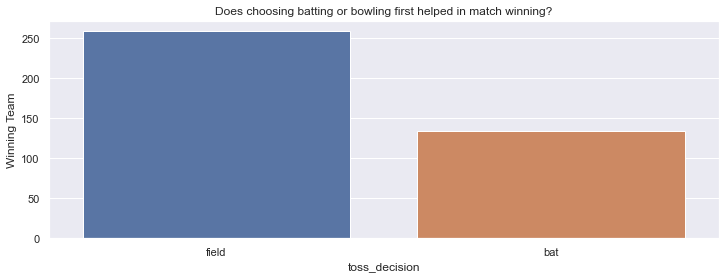

In [75]:
plt.figure(figsize=(12,4))

sns.countplot(df.toss_decision[df.toss_winner==df.winner]).set(title='Does choosing batting or bowling first helped in match winning?')
plt.ylabel('Winning Team')

plt.show()

In [76]:
df['dl_applied'].unique()

array([0, 1], dtype=int64)

In [77]:
mask9=df['team1']=='Chennai Super Kings'
mask10=df[mask9]

mask11 = df['dl_applied']==1
mask12 = df[ mask9 & mask11]


In [78]:
mask12.groupby('city')['dl_applied'].count().sort_values(ascending=True).head(10)

city
Centurion    1
Kochi        1
Kolkata      1
Name: dl_applied, dtype: int64

In [79]:
mask0 = df['dl_applied'] == 1
wh_city=df[mask0]

In [80]:
wh_city.groupby('team1')['city','team1'].count().head()

<ipython-input-80-05c4446a0f60>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



city  team1
team1                             
Chennai Super Kings       3      3
Delhi Daredevils          4      4
Kings XI Punjab           2      2
Kolkata Knight Riders     3      3
Rajasthan Royals          1      1

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



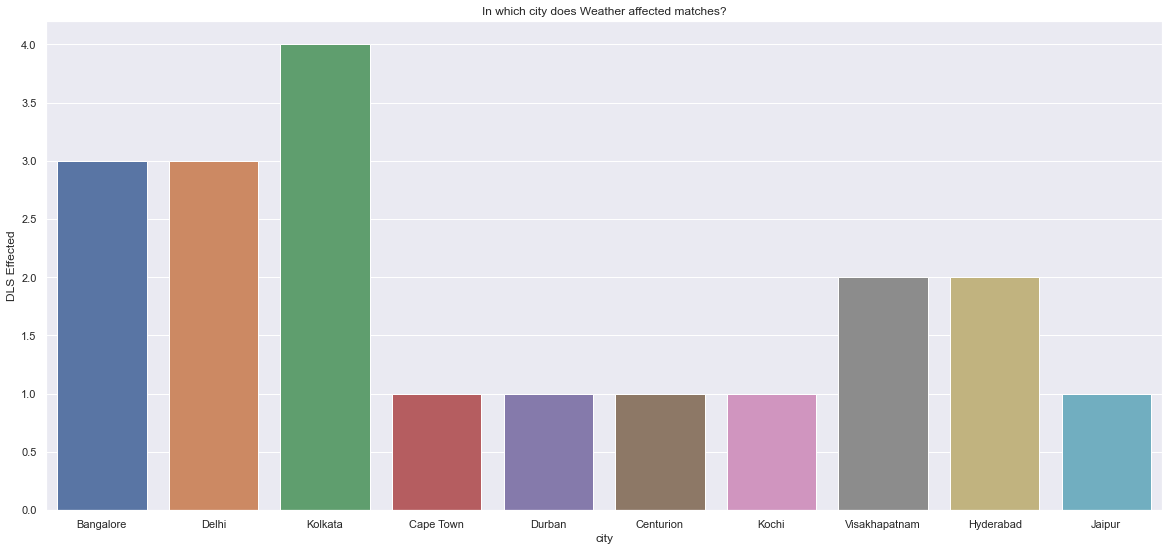

In [81]:
plt.figure(figsize=(20,9))

sns.countplot(df.city[df.dl_applied==1]).set(title='In which city does Weather affected matches?')
plt.ylabel('DLS Effected')

plt.show()

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Shubham\Anaconda\lib\site-

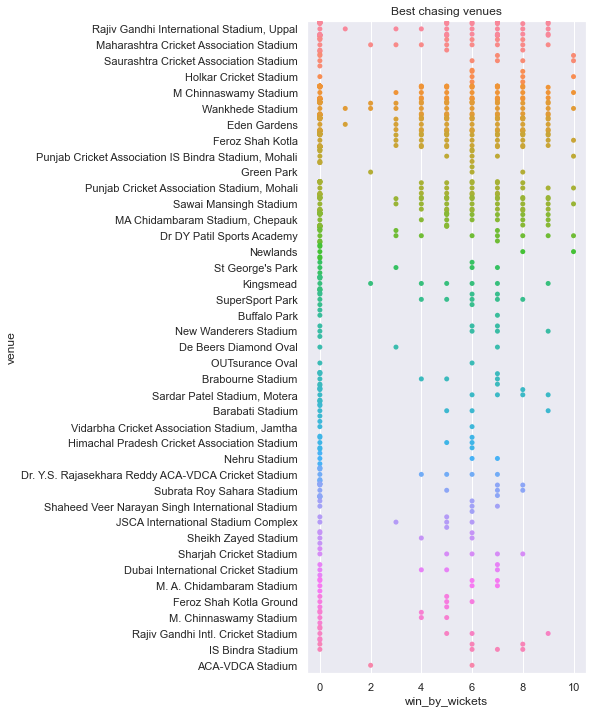

In [82]:
plt.figure(figsize=(5,12))

sns.swarmplot(x='win_by_wickets', y='venue',data=df).set(title='Best chasing venues')

plt.show()

 

In [83]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 3600x4320 with 0 Axes>

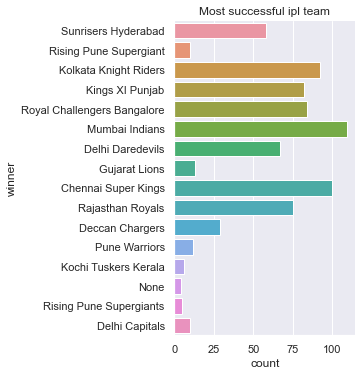

In [84]:
plt.figure(figsize=(50,60))

sns.factorplot(y='winner',kind='count',data=df).set(title='Most successful ipl team')

plt.show

In [85]:
px.bar(df, x='toss_winner',y='result',color='season',barmode='group',
      facet_row='toss_decision', facet_col='result',
      category_orders={'result':['normal', 'tie', 'no result'],
                      'toss_decision':['field','bat']})

In [86]:
df.head(5)

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4            None           None     NaN

In [87]:
df['result'].unique()



array(['normal', 'tie', 'no result'], dtype=object)

In [88]:
mask5=df['win_by_runs']!=0
batting_first=df[mask5]


In [89]:
batting_first.head()

id  season       city        date                        team1  \
0    1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
4    5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
8    9    2017       Pune  2017-04-11             Delhi Daredevils   
13  14    2017    Kolkata  2017-04-15        Kolkata Knight Riders   
14  15    2017      Delhi  2017-04-15             Delhi Daredevils   

                          team2                  toss_winner toss_decision  \
0   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4              Delhi Daredevils  Royal Challengers Bangalore           bat   
8        Rising Pune Supergiant       Rising Pune Supergiant         field   
13          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
14              Kings XI Punjab             Delhi Daredevils           bat   

    result  dl_applied                       winner  win_by_runs  \
0   normal           0          Sunrisers Hyderabad           35   
4   normal           0  Royal Challengers Bangalore           15   
8   normal           0             Delhi Daredevils           97   
13  normal           0        Kolkata Knight Riders           17   
14  normal           0             Delhi Daredevils           51   

    win_by_wickets player_of_match                                      venue  \
0                0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
4                0       KM Jadhav                      M Chinnaswamy Stadium   
8                0       SV Samson    Maharashtra Cricket Association Stadium   
13               0      RV Uthappa                               Eden Gardens   
14               0     CJ Anderson                           Feroz Shah Kotla   

        umpire1      umpire2 umpire3  
0   AY Dandekar     NJ Llong     NaN  
4          None         None     NaN  
8   AY Dandekar       S Ravi     NaN  
13  AY Dandekar     NJ Llong     NaN  
14     YC Barde  Nitin Menon     NaN

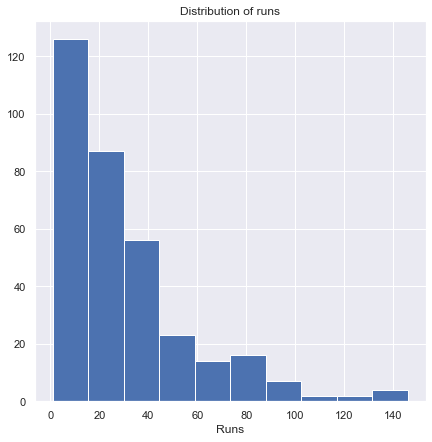

In [90]:
plt.figure(figsize=(7,7))  #who took batting decision and win by runs
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of runs")
plt.xlabel("Runs")
plt.show()

# deliveries_data

In [91]:
df1=pd.read_csv("deliveries.csv")

In [92]:
df1.head(5)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [93]:
df1['is_super_over'].unique()

array([0, 1], dtype=int64)

In [94]:
df1.describe()

match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       5.000000       4.000000       5.000000   

         noball_runs   penalty_runs   batsman_runs     extra_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.004183       0.000056       1.246864       0.067032   
std         0.070492       0.016709       1.608270       0.342553   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         5.000000       5.000000       7.000000       7.000000   

          total_runs  
count  179078.000000  
mean        1.313897  
std         1.605422  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max        10.000000

In [95]:
df1['player_dismissed'].fillna("None", inplace=True)
df1['dismissal_kind'].fillna("None", inplace=True)
df1['fielder'].fillna("None", inplace=True)

In [96]:
df1.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

[Text(0.5, 1.0, 'Coreleation Of Deliveries Data')]

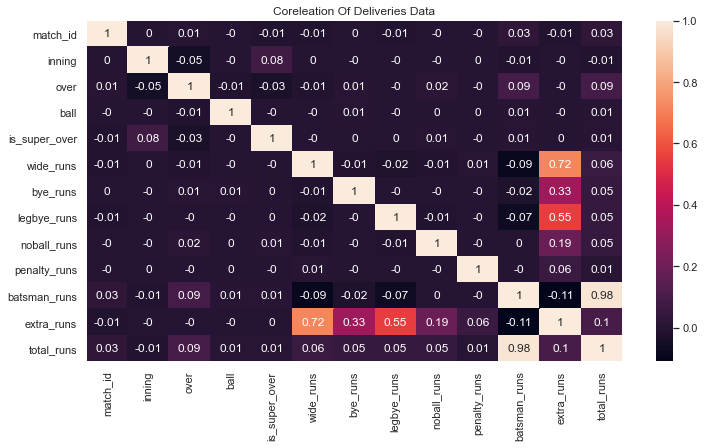

In [97]:

calculating_corr=df1.corr().round(2)
sns.set(rc={'figure.figsize':(12,6.27)})
sns.heatmap(data=calculating_corr, annot=True).set(title="Coreleation Of Deliveries Data")

In [98]:
df1.head(3)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           0              None           None    None  
1           0              None           None    None  
2           4              None           None    None  

[3 rows x 21 columns]

In [99]:
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0              None           None    None  
1           0              None           None    None  
2           4              None           None    None  
3           0              None           None    None  
4           2              None           None    None  

[5 rows x 21 columns]

In [100]:
df1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head() #top five batsman in ipl history who runs more



batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

In [101]:
ov = df1['over'] > 15
death_over=df1[ov]

all_batsman=death_over.groupby('batsman')['batsman_runs'].count()#how many bolls he i
x=all_batsman>200
batsman_list = all_batsman[x].index.tolist()



In [102]:
batsman_select=df1['batsman'].isin(batsman_list)


final=df1[batsman_select]

In [103]:
runs=final.groupby('batsman')['batsman_runs'].sum()



In [104]:
balls=final.groupby('batsman')['ball'].count()

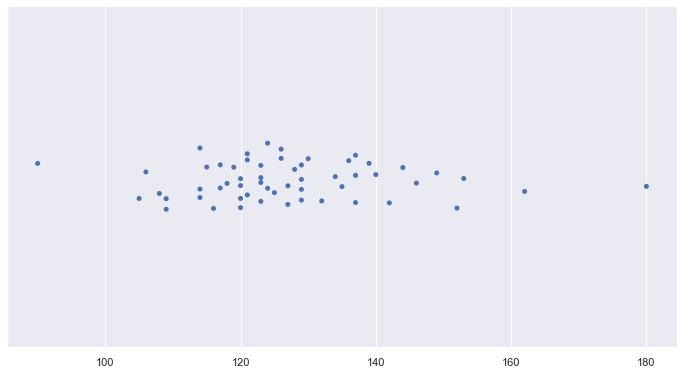

In [105]:
sr = round((runs/balls)*100)
sns.stripplot(x=sr)

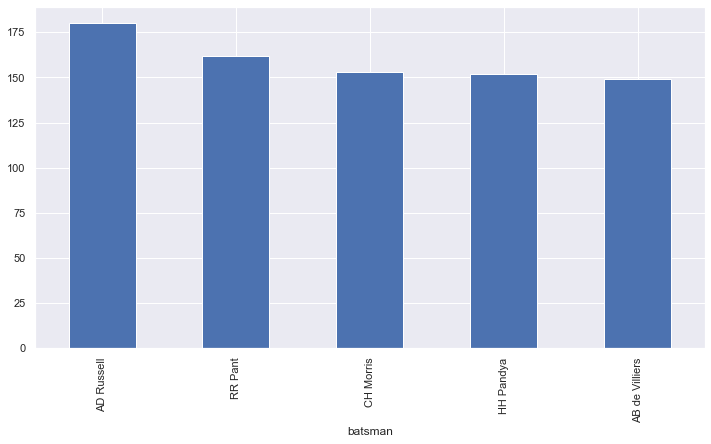

In [106]:
sr.sort_values(ascending=False).head().plot(kind="bar")

In [107]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [108]:
df1.head(5)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0              None           None    None  
1           0              None           None    None  
2           4              None           None    None  
3           0              None           None    None  
4           2              None           None    None  

[5 rows x 21 columns]

In [109]:
mask=df1['batsman_runs']==6
six=df1[mask]


In [110]:
sixes=six.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')



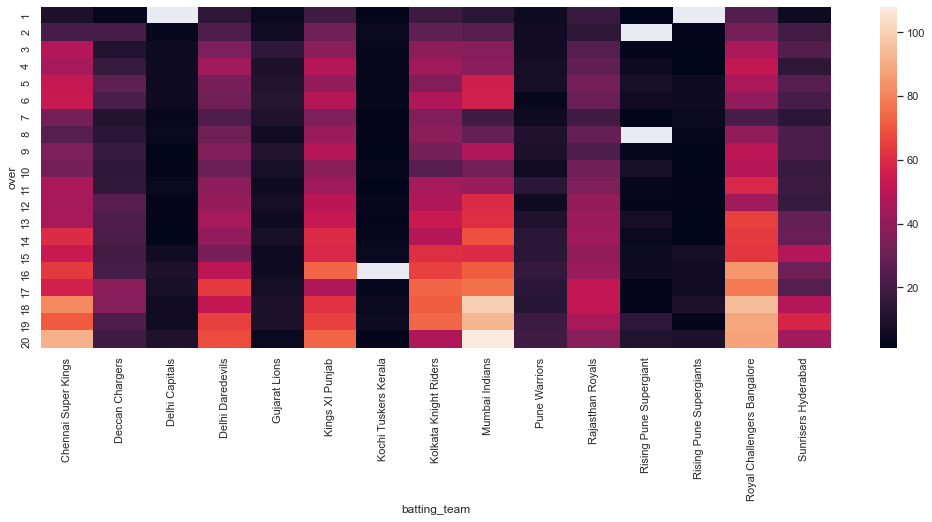

In [111]:
sns.set(rc={'figure.figsize':(17.7,6.27)})

sns.heatmap(sixes) #more number of hit 6


In [112]:
mask1=df1['batsman_runs']==4
Four=df1[mask1]


In [113]:
Four20=Four.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')



[Text(0.5, 1.0, 'which over number of hits 4')]

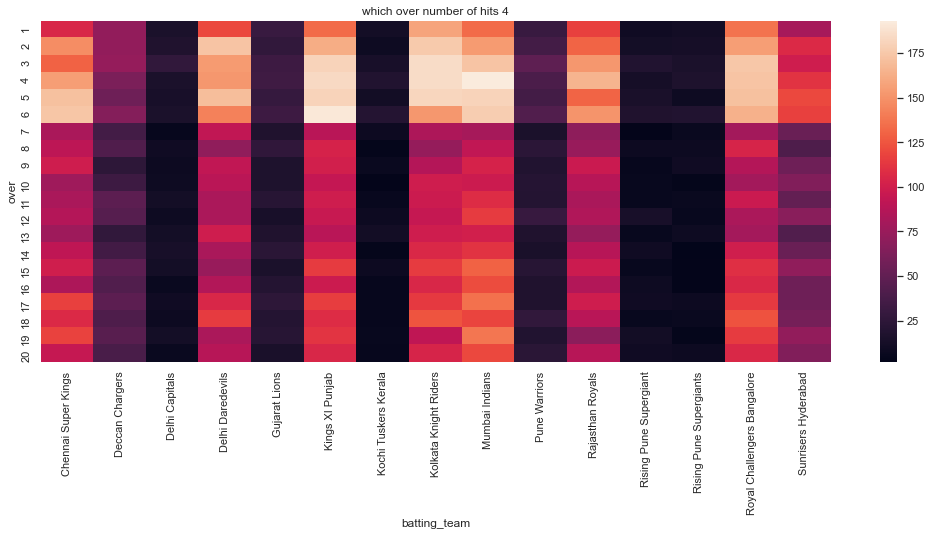

In [114]:
sns.set(rc={'figure.figsize':(17.7,6.27)})

sns.heatmap(Four20).set(title="which over number of hits 4") #more number of hit 4


In [115]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [116]:
df1['inning'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [117]:
from collections import Counter

In [118]:
print(Counter(df1['inning']))

Counter({1: 92742, 2: 86240, 3: 50, 4: 38, 5: 8})


In [119]:
df1[['over', 'ball','batsman', 'bowler','batsman_runs', 'total_runs']].describe()

over           ball   batsman_runs     total_runs
count  179078.000000  179078.000000  179078.000000  179078.000000
mean       10.162488       3.615587       1.246864       1.313897
std         5.677684       1.806966       1.608270       1.605422
min         1.000000       1.000000       0.000000       0.000000
25%         5.000000       2.000000       0.000000       0.000000
50%        10.000000       4.000000       1.000000       1.000000
75%        15.000000       5.000000       1.000000       1.000000
max        20.000000       9.000000       7.000000      10.000000

In [120]:
df1[['over', 'ball','batsman', 'bowler','batsman_runs', 'total_runs']]

over  ball    batsman      bowler  batsman_runs  total_runs
0          1     1  DA Warner    TS Mills             0           0
1          1     2  DA Warner    TS Mills             0           0
2          1     3  DA Warner    TS Mills             4           4
3          1     4  DA Warner    TS Mills             0           0
4          1     5  DA Warner    TS Mills             0           2
...      ...   ...        ...         ...           ...         ...
179073    20     2  RA Jadeja  SL Malinga             1           1
179074    20     3  SR Watson  SL Malinga             2           2
179075    20     4  SR Watson  SL Malinga             1           1
179076    20     5  SN Thakur  SL Malinga             2           2
179077    20     6  SN Thakur  SL Malinga             0           0

[179078 rows x 6 columns]

In [121]:
mask6=df1['over'] < 10

mask8 = df1['bowler'] =='TS Mills'

mask10 = df1[mask6 & mask8 ]


In [122]:
runs5 = mask10.groupby('bowler')['batsman_runs'].sum()

In [123]:
runs5/5

bowler
TS Mills    9.6
Name: batsman_runs, dtype: float64

In [124]:
ov = df1['over'] < 10
death_over=df1[ov]

all_bowler=death_over.groupby('bowler')['batsman_runs'].sum()#how many bolls he i
x=all_bowler < 200
bowler_list = all_bowler[x].index.tolist()



In [125]:
bowler_select=df1['bowler'].isin(bowler_list)


final=df1[bowler_select]

In [126]:
runs=final.groupby('bowler')['batsman_runs'].sum()



In [127]:
balls=final.groupby('bowler')['over'].count()

In [128]:
eco_rate=runs/balls

In [129]:
eco_rate.sort_values(ascending=False).head()

bowler
I Malhotra       3.833333
P Prasanth       3.000000
RR Bhatkal       2.916667
CK Kapugedera    2.882353
S Sriram         2.722222
dtype: float64

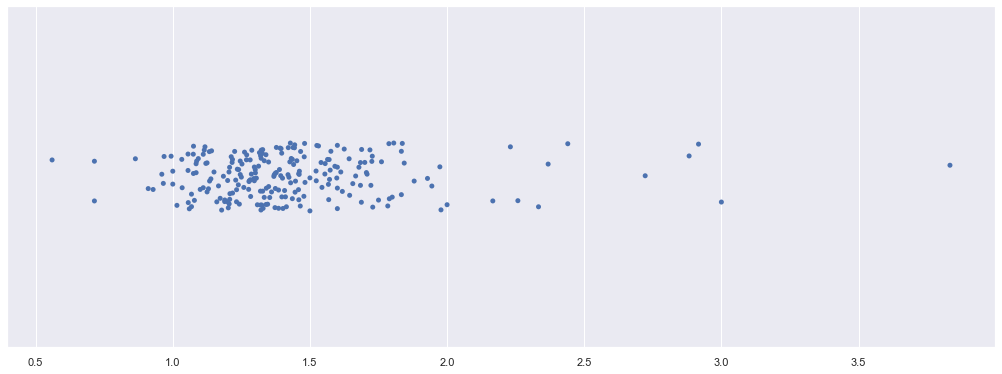

In [130]:

sns.stripplot(x=eco_rate)

In [131]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [132]:
df1.columns 

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [133]:
df1['inning'].nunique()

5

In [134]:
ining=df1['inning'] == 1
first_inning=df1[ining]


In [135]:
first_inning.groupby('batting_team')['total_runs'].sum()

batting_team
Chennai Super Kings            14835
Deccan Chargers                 6765
Delhi Capitals                  1019
Delhi Daredevils               11310
Gujarat Lions                   2267
Kings XI Punjab                14749
Kochi Tuskers Kerala            1009
Kolkata Knight Riders          13345
Mumbai Indians                 16814
Pune Warriors                   2973
Rajasthan Royals               10625
Rising Pune Supergiant          1304
Rising Pune Supergiants         1123
Royal Challengers Bangalore    14254
Sunrisers Hyderabad            10371
Name: total_runs, dtype: int64

In [136]:

df1.head(10)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
5         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
6         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
7         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     2   
8         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     2   
9         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     2   

   ball    batsman non_striker       bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan     TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan     TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan     TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan     TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan     TS Mills              0  ...         0   
5     6   S Dhawan   DA Warner     TS Mills              0  ...         0   
6     7   S Dhawan   DA Warner     TS Mills              0  ...         0   
7     1   S Dhawan   DA Warner  A Choudhary              0  ...         0   
8     2  DA Warner    S Dhawan  A Choudhary              0  ...         0   
9     3  DA Warner    S Dhawan  A Choudhary              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   
5            0            0             0             0           0   
6            1            0             0             0           1   
7            0            0             0             1           0   
8            0            0             0             4           0   
9            0            1             0             0           1   

   total_runs  player_dismissed dismissal_kind fielder  
0           0              None           None    None  
1           0              None           None    None  
2           4              None           None    None  
3           0              None           None    None  
4           2              None           None    None  
5           0              None           None    None  
6           1              None           None    None  
7           1              None           None    None  
8           4              None           None    None  
9           1              None           None    None  

[10 rows x 21 columns]

In [137]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [138]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [139]:
df3 = pd.merge(df,df1,how='outer',left_on=['id'],right_on=['match_id'])

In [140]:
df1.shape

(179078, 21)

In [141]:
df.shape

(756, 18)

In [142]:
df3.isnull().sum()

id                       0
season                   0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                   0
win_by_runs              0
win_by_wickets           0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3             150712
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed         0
d

In [143]:
df3['umpire3'].fillna("None", inplace=True)

In [144]:
df3.describe()

id         season     dl_applied    win_by_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957    2013.444510       0.017914      13.404036   
std      3472.322805       3.363947       0.132639      23.261007   
min         1.000000    2008.000000       0.000000       0.000000   
25%       190.000000    2011.000000       0.000000       0.000000   
50%       379.000000    2013.000000       0.000000       0.000000   
75%       567.000000    2016.000000       0.000000      19.000000   
max     11415.000000    2019.000000       1.000000     146.000000   

       win_by_wickets       match_id         inning           over  \
count   179078.000000  179078.000000  179078.000000  179078.000000   
mean         3.261579    1802.252957       1.482952      10.162488   
std          3.347033    3472.322805       0.502074       5.677684   
min          0.000000       1.000000       1.000000       1.000000   
25%          0.000000     190.000000       1.000000       5.000000   
50%          3.000000     379.000000       1.000000      10.000000   
75%          6.000000     567.000000       2.000000      15.000000   
max         10.000000   11415.000000       5.000000      20.000000   

                ball  is_super_over      wide_runs       bye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        3.615587       0.000452       0.036721       0.004936   
std         1.806966       0.021263       0.251161       0.116480   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         5.000000       0.000000       0.000000       0.000000   
max         9.000000       1.000000       5.000000       4.000000   

         legbye_runs    noball_runs   penalty_runs   batsman_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.021136       0.004183       0.000056       1.246864   
std         0.194908       0.070492       0.016709       1.608270   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         5.000000       5.000000       5.000000       7.000000   

          extra_runs     total_runs  
count  179078.000000  179078.000000  
mean        0.067032       1.313897  
std         0.342553       1.605422  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max         7.000000      10.000000

In [145]:
df3['batsman_runs']

0         0
1         0
2         4
3         0
4         0
         ..
179073    1
179074    2
179075    1
179076    2
179077    0
Name: batsman_runs, Length: 179078, dtype: int64

[Text(0.5, 1.0, 'obsevation')]

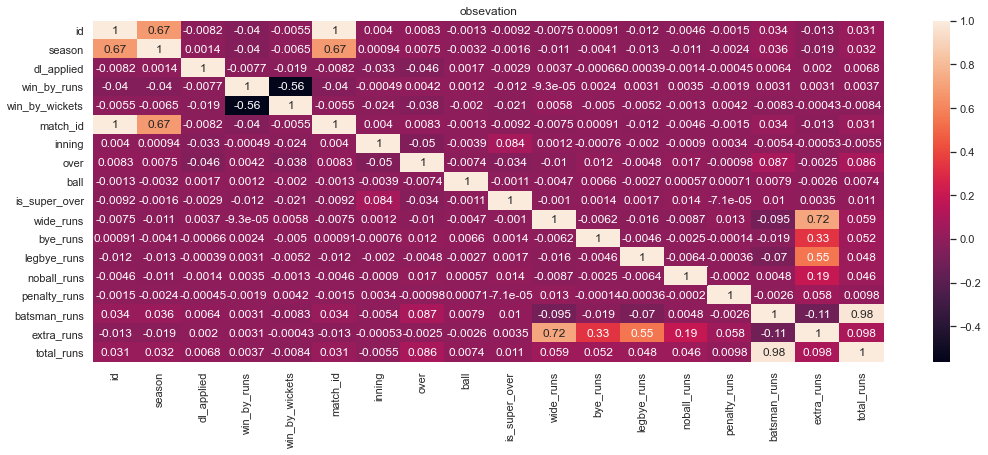

In [146]:
correleation_matrix=df3.corr()
sns.set(rc={'figure.figsize':(17.7,6.27)})
sns.heatmap(data=correleation_matrix, annot=True).set(title='obsevation')

In [147]:
df3.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [148]:
df3[['season','batsman_runs']].head()

season  batsman_runs
0    2017             0
1    2017             0
2    2017             4
3    2017             0
4    2017             0

In [149]:
mask11 = df3['batsman_runs'] == 6
season_six = df3[mask11]

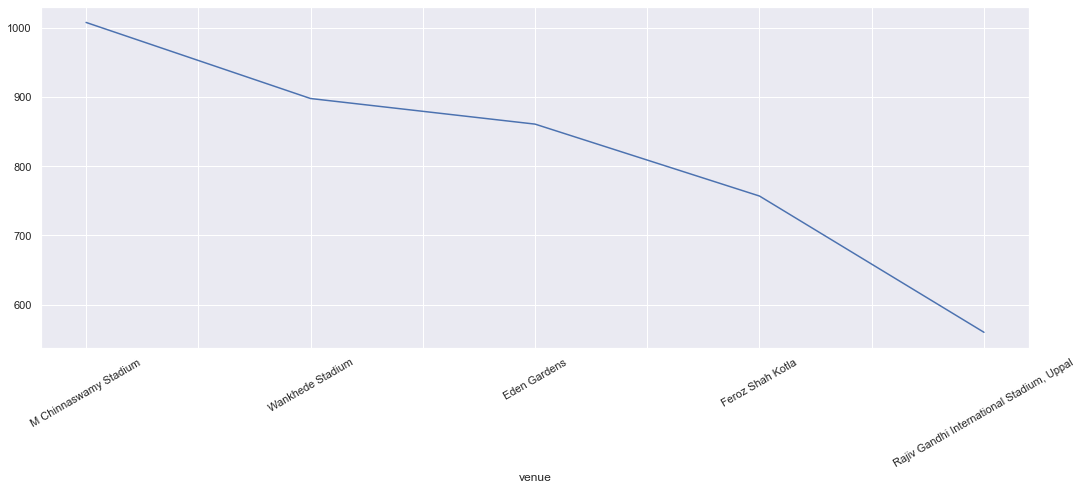

In [150]:
s6=season_six.groupby('venue')['batsman_runs'].count().sort_values(ascending=False).head()


#df = data.groupby(['pulse', 'diet', 'time']).count()['kind'] 
   
s6.plot() 
plt.xticks(rotation=30) 
plt.show() 

In [151]:
df3['dl_applied'].unique()

array([0, 1], dtype=int64)

In [152]:
df3.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [153]:
df3[['win_by_runs','over']].head()

win_by_runs  over
0           35     1
1           35     1
2           35     1
3           35     1
4           35     1

In [154]:
mask14=df3['win_by_runs'] < 50
remain=df3[mask14]

In [155]:
remain.groupby('team1')['over'].count()

team1
Chennai Super Kings            18265
Deccan Chargers                 9627
Delhi Capitals                  1451
Delhi Daredevils               15606
Gujarat Lions                   3309
Kings XI Punjab                20302
Kochi Tuskers Kerala            1650
Kolkata Knight Riders          18765
Mumbai Indians                 22137
Pune Warriors                   4759
Rajasthan Royals               14383
Rising Pune Supergiant          1715
Rising Pune Supergiants         1592
Royal Challengers Bangalore    18408
Sunrisers Hyderabad            14511
Name: over, dtype: int64

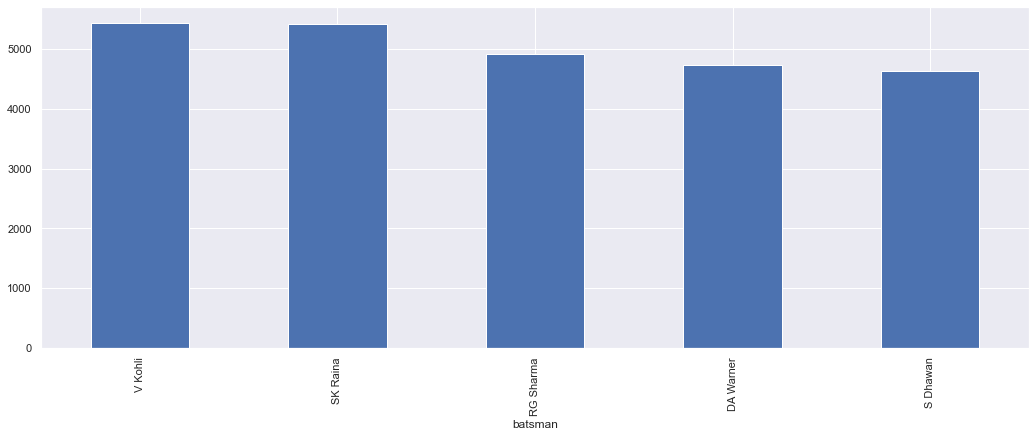

In [156]:
runs=df3.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head().plot(kind='bar')

In [248]:
combteam=df[np.logical_or(np.logical_and(df['team1']=='Kings XI Punjab',df['team2']=='Mumbai Indians'),np.logical_and(df['team2']=='Kings XI Punjab',df['team1']=='Mumbai Indians'))]

In [249]:
combteam.head(5)

id  season        city        date            team1           team2  \
21    22    2017      Indore  2017-04-20  Kings XI Punjab  Mumbai Indians   
49    50    2017      Mumbai  2017-05-11  Kings XI Punjab  Mumbai Indians   
68    69    2008  Chandigarh  2008-04-25  Kings XI Punjab  Mumbai Indians   
105  106    2008      Mumbai  2008-05-21  Kings XI Punjab  Mumbai Indians   
134  135    2009      Durban  2009-04-29  Kings XI Punjab  Mumbai Indians   

         toss_winner toss_decision  result  dl_applied           winner  \
21    Mumbai Indians         field  normal           0   Mumbai Indians   
49    Mumbai Indians         field  normal           0  Kings XI Punjab   
68    Mumbai Indians         field  normal           0  Kings XI Punjab   
105   Mumbai Indians         field  normal           0  Kings XI Punjab   
134  Kings XI Punjab           bat  normal           0  Kings XI Punjab   

     win_by_runs  win_by_wickets player_of_match  \
21             0               8      JC Buttler   
49             7               0         WP Saha   
68            66               0   KC Sangakkara   
105            1               0        SE Marsh   
134            3               0   KC Sangakkara   

                                          venue     umpire1         umpire2  \
21                       Holkar Cricket Stadium   M Erasmus   C Shamshuddin   
49                             Wankhede Stadium  A Deshmukh  A Nand Kishore   
68   Punjab Cricket Association Stadium, Mohali   Aleem Dar       AM Saheba   
105                            Wankhede Stadium   BF Bowden  GA Pratapkumar   
134                                   Kingsmead   MR Benson      SL Shastri   

    umpire3  
21      NaN  
49      NaN  
68      NaN  
105     NaN  
134     NaN

C:\Users\Shubham\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



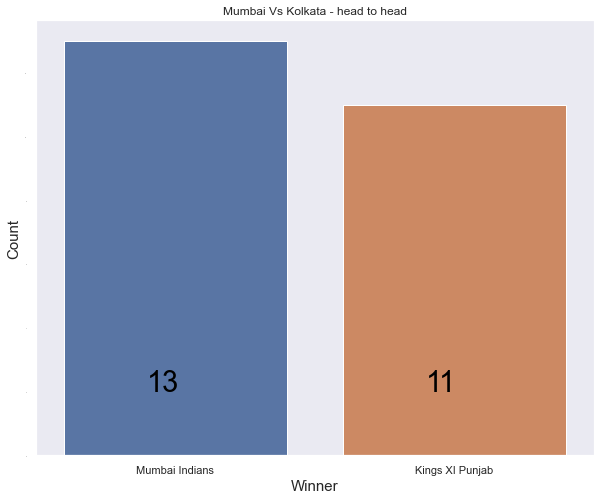

In [250]:
#sns.set_style("ticks")

#sns.set_style("whitegrid")
#sns.set(style='darkgrid')
#sns.set(style='dark')
sns.set_style("white")

sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(combteam['winner'],order=combteam['winner'].value_counts().index)
plt.text(-0.1,2,str(combteam['winner'].value_counts()['Mumbai Indians']),size=29,color='black')
plt.text(0.9,2,str(combteam['winner'].value_counts()['Kings XI Punjab']),size=29,color='black')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('Mumbai Vs Kolkata - head to head')
plt.show()

# Mumbai Indians Player Wise Performance Analysis  

In [160]:
mask0=df1['batting_team']=='Mumbai Indians'
batting=df1[mask0]


In [254]:




all_batsman = batting.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)

x=all_batsman>200
batsman_list = Top_5[x].index.tolist()




AttributeError: 'builtin_function_or_method' object has no attribute 'tolist'

In [162]:
batsman_selected=df1['batsman'].isin(batsman_list)


In [163]:
final=df1[batsman_select]

In [164]:
runs=final.groupby('batsman')['batsman_runs'].sum()

balls=final.groupby('batsman')['ball'].count()

In [165]:
sr = round((runs/balls)*100)
sr.head(5).sort_values(ascending=False)


batsman
AD Russell        180.0
AB de Villiers    149.0
AD Mathews        121.0
AM Rahane         120.0
A Mishra           90.0
dtype: float64

# Mi Player average calculate

In [166]:
Top_5_avg = batting.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)

batsman_list_MI = Top_5_avg.index.tolist()



In [167]:
batsman_select_MI=df1['batsman'].isin(batsman_list_MI)


In [168]:
final_MI=df1[batsman_select_MI]


In [169]:
runs_MI=final_MI.groupby('batsman')['batsman_runs'].sum()


In [170]:
maskk9 = df1['dismissal_kind'] != 'None'


wickets = df1[maskk9]


wic_MI = final_MI.groupby('player_dismissed')['dismissal_kind'].count()




In [171]:
MI_avg = runs_MI/wic_MI

In [172]:
MI_avg.sort_values(ascending=True).head(5)

KA Pollard      28.701031
AT Rayudu       29.433628
HH Pandya       30.216216
RG Sharma       31.703226
SR Tendulkar    34.835821
dtype: float64

# MI Bowler average

In [173]:
mask_1=df1['bowling_team']=='Mumbai Indians'
MI_Bowling_avg=df1[mask_1]








In [174]:
Top_5_MI_AVG = MI_Bowling_avg.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(5)


MI_Bowling_avg = Top_5_MI_AVG.index.tolist()


In [175]:

MI_bowler_team=df1['bowler'].isin(MI_Bowling_avg)

final_bowler_MI=df1[MI_bowler_team]


In [176]:

final_run_gave = final_bowler_MI.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False)


maskk9 = df1['dismissal_kind'] != 'None'


MI_wickets = df1[maskk9]


In [177]:

Mi_wickets_take = MI_wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False)

avg = final_run_gave/Mi_wickets_take
avg.sort_values(ascending=False).head(4)


bowler
KA Pollard         25.194030
Harbhajan Singh    24.099379
JJ Bumrah          23.956044
MJ McClenaghan     23.413333
dtype: float64

# Kings XI Punjab Player Wise Performance Analysis  

In [179]:
mask0=df1['batting_team']=='Kings XI Punjab'
KI_batting=df1[mask0]


In [180]:
Top_5_KI = KI_batting.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)
x=all_batsman > 200
batsman_list_KI = Top_5_KI[x].index.tolist()




In [181]:
batsman_select_KI=df1['batsman'].isin(batsman_list_KI)


In [182]:
final_KI=df1[batsman_select_KI]

In [183]:
runs_KI=final_KI.groupby('batsman')['batsman_runs'].sum()

balls_KI=final_KI.groupby('batsman')['ball'].count()

In [184]:
sr_KI = round((runs_KI/balls_KI)*100)
print("Top Batsman XI Punjab and strike rate", '\n',sr_KI)

Top Batsman XI Punjab and strike rate 
 batsman
DA Miller    136.0
KL Rahul     137.0
WP Saha      129.0
dtype: float64


In [185]:
KI_batting.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(11)

batsman
SE Marsh         2489
DA Miller        1875
KL Rahul         1288
GJ Maxwell       1187
WP Saha          1115
KC Sangakkara    1009
Yuvraj Singh      964
M Vohra           957
Mandeep Singh     931
CH Gayle          909
AC Gilchrist      849
Name: batsman_runs, dtype: int64

# Kings XI batting avg player

In [186]:
Top_5_KI_AVG = KI_batting.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)

batsman_list_KI_AVG = Top_5_KI_AVG.index.tolist()




In [187]:
batsman_select_KI_AVG=df1['batsman'].isin(batsman_list_KI_AVG)

final_KI_AVG=df1[batsman_select_KI_AVG]





In [188]:

runs_KI_AVG=final_KI_AVG.groupby('batsman')['batsman_runs'].sum()





In [189]:
maskk9 = df1['dismissal_kind'] != 'None'


wickets_KI_AVG = df1[maskk9]


In [190]:

wic_KI_AVG = final_KI_AVG.groupby('player_dismissed')['dismissal_kind'].count()


KI_AVG = runs_KI/wic_KI_AVG


KI_AVG.sort_values(ascending=True).head(3)

WP Saha      24.383562
DA Miller    34.722222
KL Rahul     42.829787
dtype: float64

In [191]:
#TILL NOW HOW MUCH WICKETS TAKE BALLER WICKETS TAKE 

#purple cap player

In [192]:
masking = df1['dismissal_kind'] != 'None'
wickets = df1[masking]

In [193]:
wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
Name: dismissal_kind, dtype: int64

In [194]:
#Orange Cap Holder

In [195]:
df1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

In [196]:
#bowling average
df1.head(4)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           0              None           None    None  
1           0              None           None    None  
2           4              None           None    None  
3           0              None           None    None  

[4 rows x 21 columns]

In [197]:
#malinga average
maskiing = df1['bowler'] == 'SL Malinga'
bowli = df1[maskiing]

runs_gave = bowli.groupby('bowler')['total_runs'].sum().sort_values(ascending=False)
runs_gave

bowler
SL Malinga    3511
Name: total_runs, dtype: int64

In [198]:
bow = df1['bowler'] == 'SL Malinga'

masking_val = df1['dismissal_kind'] != 'None'
wic_till = df1[masking_val & bow]

wick_take = wic_till.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False)

In [199]:
wick_take

bowler
SL Malinga    188
Name: dismissal_kind, dtype: int64

In [200]:
Bowl_avg = runs_gave/wick_take

In [201]:
Bowl_avg

bowler
SL Malinga    18.675532
dtype: float64

# calculation Kings XI Punjab bowler avg

In [202]:
mask_1=df1['bowling_team']=='Kings XI Punjab'
KI_Bowling_avg=df1[mask_1]



Top_5_KI_AVG = KI_Bowling_avg.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(5)


batsman_list_KI_AVG = Top_5_KI_AVG.index.tolist()

batsman_list_KI_AVG



['PP Chawla', 'AR Patel', 'Sandeep Sharma', 'IK Pathan', 'P Kumar']

In [203]:
bowler_team=df1['bowler'].isin(batsman_list_KI_AVG)

final_bowler=df1[bowler_team]

In [204]:
final_run_gave = final_bowler.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False)


In [205]:
maskk9 = df1['dismissal_kind'] != 'None'


wickets = df1[maskk9]


wickets_take = wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=True)


In [206]:
avg = final_run_gave/wickets_take
avg.sort_values(ascending=False).head(4)

bowler
P Kumar      30.450980
AR Patel     27.657895
IK Pathan    25.949495
PP Chawla    25.782051
dtype: float64

# Time series Analysis on cricket date and current player

In [207]:


df3["date"] = pd.to_datetime(df3["date"])

In [208]:
df3.set_index(['date'],inplace=True)

In [209]:
df3.index

DatetimeIndex(['2017-04-05', '2017-04-05', '2017-04-05', '2017-04-05',
               '2017-04-05', '2017-04-05', '2017-04-05', '2017-04-05',
               '2017-04-05', '2017-04-05',
               ...
               '2019-12-05', '2019-12-05', '2019-12-05', '2019-12-05',
               '2019-12-05', '2019-12-05', '2019-12-05', '2019-12-05',
               '2019-12-05', '2019-12-05'],
              dtype='datetime64[ns]', name='date', length=179078, freq=None)

In [210]:
df3.columns

Index(['id', 'season', 'city', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [211]:
time_data=df3.loc['2019-02-05':'2019-12-05']

In [212]:
mask0=time_data['batting_team']=='Kings XI Punjab'
batting=time_data[mask0]



In [213]:

Top_5 = batting.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)

x=all_batsman>200
batsman_list = Top_5[x].index.tolist()


In [214]:

batsman_selected=time_data['batsman'].isin(batsman_list)



In [215]:
final=time_data[batsman_selected]

In [216]:

runs=final.groupby('batsman')['batsman_runs'].sum()


In [217]:


balls=final.groupby('batsman')['ball'].count()



In [218]:


sr = round((runs/balls)*100)
sr.head(5).sort_values(ascending=False)




batsman
CH Gayle     155.0
KL Rahul     136.0
DA Miller    128.0
dtype: float64

# Prepare Your Data For Machine Learning

In [219]:
df.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [220]:
df['winner'].head(20)

0             Sunrisers Hyderabad
1          Rising Pune Supergiant
2           Kolkata Knight Riders
3                 Kings XI Punjab
4     Royal Challengers Bangalore
5             Sunrisers Hyderabad
6                  Mumbai Indians
7                 Kings XI Punjab
8                Delhi Daredevils
9                  Mumbai Indians
10          Kolkata Knight Riders
11                 Mumbai Indians
12                  Gujarat Lions
13          Kolkata Knight Riders
14               Delhi Daredevils
15                 Mumbai Indians
16         Rising Pune Supergiant
17          Kolkata Knight Riders
18            Sunrisers Hyderabad
19    Royal Challengers Bangalore
Name: winner, dtype: object

In [221]:
df3.columns


Index(['id', 'season', 'city', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [222]:
df3['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [223]:
df4 = pd.merge(df,df1,how='outer',left_on=['id'],right_on=['match_id'])

In [224]:
twoTeam=df4[np.logical_or(np.logical_and(df4['team1']=='Kings XI Punjab',df4['team2']=='Mumbai Indians'),np.logical_and(df4['team2']=='Kings XI Punjab',df4['team1']=='Mumbai Indians'))]

In [225]:
twoTeam.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [226]:
remove_columns = ['batsman','season', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning',
       'ball','non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs','extra_runs', 'player_dismissed',
       'dismissal_kind', 'fielder']

In [227]:
 remove_columns = ['city']

In [228]:
twoTeam.drop(labels=remove_columns, axis=1, inplace=True)

C:\Users\Shubham\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
twoTeam.columns

Index(['id', 'season', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [230]:
twoTeam.head(4)

id  season        date            team1           team2     toss_winner  \
5055  22    2017  2017-04-20  Kings XI Punjab  Mumbai Indians  Mumbai Indians   
5056  22    2017  2017-04-20  Kings XI Punjab  Mumbai Indians  Mumbai Indians   
5057  22    2017  2017-04-20  Kings XI Punjab  Mumbai Indians  Mumbai Indians   
5058  22    2017  2017-04-20  Kings XI Punjab  Mumbai Indians  Mumbai Indians   

     toss_decision  result  dl_applied          winner  ...  bye_runs  \
5055         field  normal           0  Mumbai Indians  ...         0   
5056         field  normal           0  Mumbai Indians  ...         0   
5057         field  normal           0  Mumbai Indians  ...         0   
5058         field  normal           0  Mumbai Indians  ...         0   

      legbye_runs noball_runs penalty_runs batsman_runs extra_runs total_runs  \
5055            0           0            0            1          0          1   
5056            0           0            0            0          0          0   
5057            0           0            0            4          0          4   
5058            0           0            0            0          0          0   

      player_dismissed  dismissal_kind fielder  
5055              None            None    None  
5056              None            None    None  
5057              None            None    None  
5058              None            None    None  

[4 rows x 38 columns]

In [231]:
print(twoTeam['batting_team'].unique())

['Kings XI Punjab' 'Mumbai Indians']


In [232]:
print(twoTeam['bowling_team'].unique())

['Mumbai Indians' 'Kings XI Punjab']


In [233]:
twoTeam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5834 entries, 5055 to 170583
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5834 non-null   int64 
 1   season            5834 non-null   int64 
 2   date              5834 non-null   object
 3   team1             5834 non-null   object
 4   team2             5834 non-null   object
 5   toss_winner       5834 non-null   object
 6   toss_decision     5834 non-null   object
 7   result            5834 non-null   object
 8   dl_applied        5834 non-null   int64 
 9   winner            5834 non-null   object
 10  win_by_runs       5834 non-null   int64 
 11  win_by_wickets    5834 non-null   int64 
 12  player_of_match   5834 non-null   object
 13  venue             5834 non-null   object
 14  umpire1           5834 non-null   object
 15  umpire2           5834 non-null   object
 16  umpire3           988 non-null    object
 17  match_id 

In [234]:
twoTeam = twoTeam[twoTeam['over'] >= 5]

In [235]:
twoTeam["date"] = pd.to_datetime(twoTeam["date"])

In [236]:
twoTeam.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 5079 to 170583
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                4640 non-null   int64         
 1   season            4640 non-null   int64         
 2   date              4640 non-null   datetime64[ns]
 3   team1             4640 non-null   object        
 4   team2             4640 non-null   object        
 5   toss_winner       4640 non-null   object        
 6   toss_decision     4640 non-null   object        
 7   result            4640 non-null   object        
 8   dl_applied        4640 non-null   int64         
 9   winner            4640 non-null   object        
 10  win_by_runs       4640 non-null   int64         
 11  win_by_wickets    4640 non-null   int64         
 12  player_of_match   4640 non-null   object        
 13  venue             4640 non-null   object        
 14  umpire1           4

In [237]:
twoTeam.head(4)

id  season       date            team1           team2     toss_winner  \
5079  22    2017 2017-04-20  Kings XI Punjab  Mumbai Indians  Mumbai Indians   
5080  22    2017 2017-04-20  Kings XI Punjab  Mumbai Indians  Mumbai Indians   
5081  22    2017 2017-04-20  Kings XI Punjab  Mumbai Indians  Mumbai Indians   
5082  22    2017 2017-04-20  Kings XI Punjab  Mumbai Indians  Mumbai Indians   

     toss_decision  result  dl_applied          winner  ...  bye_runs  \
5079         field  normal           0  Mumbai Indians  ...         0   
5080         field  normal           0  Mumbai Indians  ...         0   
5081         field  normal           0  Mumbai Indians  ...         0   
5082         field  normal           0  Mumbai Indians  ...         0   

      legbye_runs noball_runs penalty_runs batsman_runs extra_runs total_runs  \
5079            0           0            0            0          0          0   
5080            0           0            0            6          0          6   
5081            0           0            0            1          0          1   
5082            0           0            0            0          0          0   

      player_dismissed  dismissal_kind fielder  
5079              None            None    None  
5080              None            None    None  
5081              None            None    None  
5082              None            None    None  

[4 rows x 38 columns]

In [238]:
encoded_twoTeam = pd.get_dummies(data=twoTeam, columns=['team1','team2','batting_team','bowling_team'])

In [239]:
encoded_twoTeam.head(5)

id  season       date     toss_winner toss_decision  result  dl_applied  \
5079  22    2017 2017-04-20  Mumbai Indians         field  normal           0   
5080  22    2017 2017-04-20  Mumbai Indians         field  normal           0   
5081  22    2017 2017-04-20  Mumbai Indians         field  normal           0   
5082  22    2017 2017-04-20  Mumbai Indians         field  normal           0   
5083  22    2017 2017-04-20  Mumbai Indians         field  normal           0   

              winner  win_by_runs  win_by_wickets  ... dismissal_kind fielder  \
5079  Mumbai Indians            0               8  ...           None    None   
5080  Mumbai Indians            0               8  ...           None    None   
5081  Mumbai Indians            0               8  ...           None    None   
5082  Mumbai Indians            0               8  ...           None    None   
5083  Mumbai Indians            0               8  ...           None    None   

     team1_Kings XI Punjab team1_Mumbai Indians team2_Kings XI Punjab  \
5079                     1                    0                     0   
5080                     1                    0                     0   
5081                     1                    0                     0   
5082                     1                    0                     0   
5083                     1                    0                     0   

      team2_Mumbai Indians  batting_team_Kings XI Punjab  \
5079                     1                             1   
5080                     1                             1   
5081                     1                             1   
5082                     1                             1   
5083                     1                             1   

      batting_team_Mumbai Indians  bowling_team_Kings XI Punjab  \
5079                            0                             0   
5080                            0                             0   
5081                            0                             0   
5082                            0                             0   
5083                            0                             0   

     bowling_team_Mumbai Indians  
5079                           1  
5080                           1  
5081                           1  
5082                           1  
5083                           1  

[5 rows x 42 columns]

In [240]:
twoTeam.columns

Index(['id', 'season', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [241]:
X= twoTeam[['id', 'date', 'team1', 'team2', 'match_id', 'batting_team','bowling_team', 'over', 'batsman_runs', 'total_runs']]


In [242]:
y = twoTeam[['total_runs']] 

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80)

In [245]:
from sklearn.linear_model import LinearRegression

In [246]:
lrm = LinearRegression()


In [247]:
lrm.fit(X_train,y_train)

TypeError: invalid type promotion